In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


In [21]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [25]:
import yfinance as yf

crypto_currency = 'BTC'
against_currency = 'USD'
a = 'BTC-USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = yf.download(a, start=start, end=end)

# Afficher les premières lignes des données
print(data)


[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2016-01-01    430.721008    436.246002    427.515015    434.334015   
2016-01-02    434.622009    436.062012    431.869995    433.437988   
2016-01-03    433.578003    433.743011    424.705994    430.010986   
2016-01-04    430.061005    434.516998    429.084015    433.091003   
2016-01-05    433.069000    434.182007    429.675995    431.959991   
...                  ...           ...           ...           ...   
2023-10-06  27412.123047  28252.537109  27215.552734  27946.597656   
2023-10-07  27946.781250  28028.091797  27870.423828  27968.839844   
2023-10-08  27971.677734  28102.169922  27740.662109  27935.089844   
2023-10-09  27934.472656  27989.470703  27302.562500  27583.677734   
2023-10-10  27599.025391  27715.847656  27370.615234  27446.318359   

               Adj C

In [ ]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [28]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [29]:

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
87/87 [==============================] - 18s 82ms/step - loss: 0.0077
Epoch 2/25
87/87 [==============================] - 10s 110ms/step - loss: 0.0025
Epoch 3/25
87/87 [==============================] - 8s 88ms/step - loss: 0.0022
Epoch 4/25
87/87 [==============================] - 7s 84ms/step - loss: 0.0020
Epoch 5/25
87/87 [==============================] - 10s 110ms/step - loss: 0.0021
Epoch 6/25
87/87 [==============================] - 9s 108ms/step - loss: 0.0018
Epoch 7/25
87/87 [==============================] - 7s 83ms/step - loss: 0.0015
Epoch 8/25
87/87 [==============================] - 7s 79ms/step - loss: 0.0018
Epoch 9/25
87/87 [==============================] - 7s 79ms/step - loss: 0.0014
Epoch 10/25
87/87 [==============================] - 7s 79ms/step - loss: 0.0014
Epoch 11/25
87/87 [==============================] - 7s 80ms/step - loss: 0.0014
Epoch 12/25
87/87 [==============================] - 7s 78ms/step - loss: 0.0012
Epoch 13/25
87/87 [============

In [34]:

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(a, start=test_start, end=test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

[*********************100%%**********************]  1 of 1 completed


In [35]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [36]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

44/44 [==============================] - 6s 48ms/step


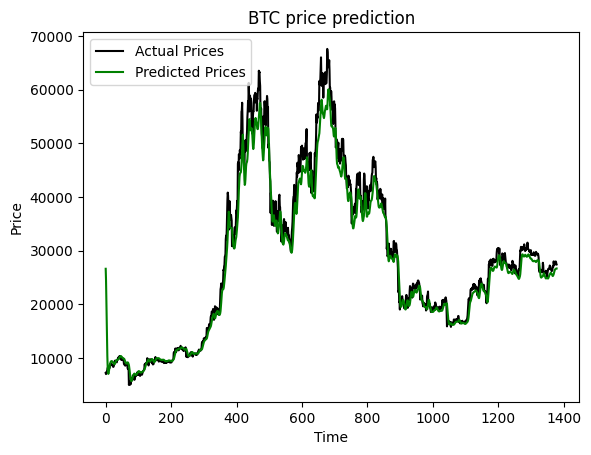

In [37]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [38]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days : len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 3s 3s/step
[[26603.998]]


Epoch 1/25
86/86 [==============================] - 24s 122ms/step - loss: 0.0132
Epoch 2/25
86/86 [==============================] - 10s 122ms/step - loss: 0.0078
Epoch 3/25
86/86 [==============================] - 11s 124ms/step - loss: 0.0078
Epoch 4/25
86/86 [==============================] - 11s 123ms/step - loss: 0.0070
Epoch 5/25
86/86 [==============================] - 11s 126ms/step - loss: 0.0065
Epoch 6/25
86/86 [==============================] - 11s 123ms/step - loss: 0.0064
Epoch 7/25
86/86 [==============================] - 11s 122ms/step - loss: 0.0063
Epoch 8/25
86/86 [==============================] - 11s 123ms/step - loss: 0.0063
Epoch 9/25
86/86 [==============================] - 11s 122ms/step - loss: 0.0064
Epoch 10/25
86/86 [==============================] - 11s 122ms/step - loss: 0.0061
Epoch 11/25
86/86 [==============================] - 10s 122ms/step - loss: 0.0058
Epoch 12/25
86/86 [==============================] - 11s 122ms/step - loss: 0.0058
Epoch 13/25
8

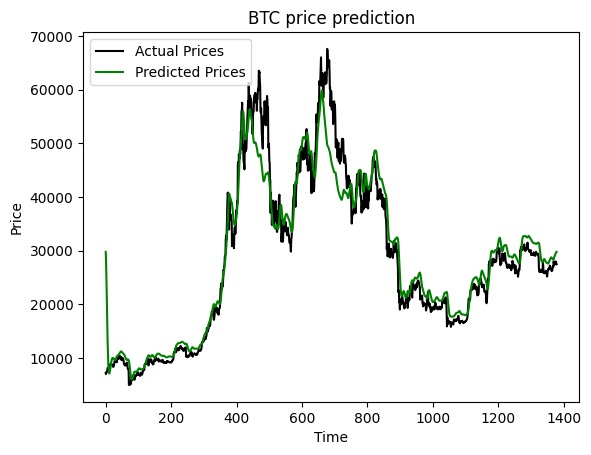

In [39]:

prediction_days = 60
future_day = 30
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(a, start=test_start, end=test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()